# CPU time of LLCS Algorithms

To generate a new results.json benchmark file, run the following command in the project's root directory:
```bash
./cmake-build-debug/benchmark/Bench_LLCS --benchmark_out=results.json --benchmark_out_format=json
cp cmake-build-debug/benchmark/results.json docs/LLCS_Bench/results.json
```

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
plt.rcParams.update({
    "font.size": 14,           # Grundschriftgröße
    "axes.titlesize": 16,      # Achsentitel
    "axes.labelsize": 14,      # Achsenbeschriftung
    "xtick.labelsize": 12,     # Tick-Beschriftung x
    "ytick.labelsize": 12,     # Tick-Beschriftung y
    "legend.fontsize": 12,     # Legende
})

In [3]:
# Load the JSON file
with open('results3.json') as f:
    data = json.load(f)

In [4]:
benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)
df[['series', 'N', 'M']] = df['name'].str.split('/', n=2, expand=True)
df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,series,N,M
0,BM_LLCS2_STD_FL/8/8,0,0,BM_LLCS2_STD_FL/8/8,iteration,1,0,1,112000,1.096770e+04,9.905134e+03,ns,BM_LLCS2_STD_FL,8,8
1,BM_LLCS2_STD_FL/8/16,0,1,BM_LLCS2_STD_FL/8/16,iteration,1,0,1,32000,1.848336e+04,1.806641e+04,ns,BM_LLCS2_STD_FL,8,16
2,BM_LLCS2_STD_FL/8/32,0,2,BM_LLCS2_STD_FL/8/32,iteration,1,0,1,26353,3.331830e+04,3.023849e+04,ns,BM_LLCS2_STD_FL,8,32
3,BM_LLCS2_STD_FL/8/64,0,3,BM_LLCS2_STD_FL/8/64,iteration,1,0,1,8960,6.344926e+04,6.452288e+04,ns,BM_LLCS2_STD_FL,8,64
4,BM_LLCS2_STD_FL/8/128,0,4,BM_LLCS2_STD_FL/8/128,iteration,1,0,1,4978,1.218673e+05,1.255524e+05,ns,BM_LLCS2_STD_FL,8,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,BM_LLCS2_SA_RMQ/256/16,9,31,BM_LLCS2_SA_RMQ/256/16,iteration,1,0,1,112,5.836615e+06,5.859375e+06,ns,BM_LLCS2_SA_RMQ,256,16
356,BM_LLCS2_SA_RMQ/256/32,9,32,BM_LLCS2_SA_RMQ/256/32,iteration,1,0,1,50,1.225071e+07,1.156250e+07,ns,BM_LLCS2_SA_RMQ,256,32
357,BM_LLCS2_SA_RMQ/256/64,9,33,BM_LLCS2_SA_RMQ/256/64,iteration,1,0,1,28,2.529794e+07,2.455357e+07,ns,BM_LLCS2_SA_RMQ,256,64
358,BM_LLCS2_SA_RMQ/256/128,9,34,BM_LLCS2_SA_RMQ/256/128,iteration,1,0,1,10,5.328957e+07,5.312500e+07,ns,BM_LLCS2_SA_RMQ,256,128


## CPU Time of LLCS2_STD_FL

Note: The `plot_cpu_time_over_NM` assumes that the unit in `results.json` is nanoseconds

In [5]:
def plot_cpu_time_over_NM(df, series_name, aggfunc="mean"):
    df_filtered = df[df['series'] == series_name].copy()
    df_filtered['N'] = pd.to_numeric(df_filtered['N'], errors='coerce')
    df_filtered['M'] = pd.to_numeric(df_filtered['M'], errors='coerce')
    df_filtered.dropna(subset=['N', 'M'], inplace=True)
    df_filtered['NM'] = df_filtered['N'] * df_filtered['M']
    
    df_grouped = df_filtered.groupby("NM", as_index=False).agg({"cpu_time": aggfunc})
    df_grouped.sort_values(by="NM", inplace=True)

    ax = df_grouped.plot(
        x='NM', y='cpu_time',
        kind='line', marker='o',
        figsize=(10, 6), grid=True, label=f'{series_name}'
    )

    ax.set_xlabel('Input Größe $N \\times M$')   # mit LaTeX
    ax.set_ylabel('CPU Zeit [ns]')
    #ax.set_title(f'CPU Zeit über $N \\times M$ für {series_name}', pad=10)
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    #plt.tight_layout()
    #plt.savefig(f"{series_name}_cpu_time.png", dpi=300, bbox_inches="tight")
    plt.savefig(f"{series_name}_cpu_time.eps", format="eps", bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


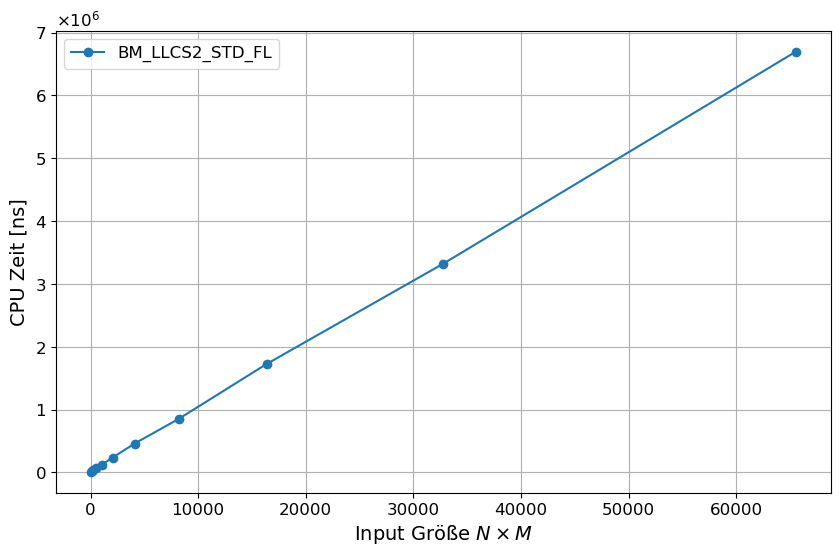

In [6]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_STD_FL')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


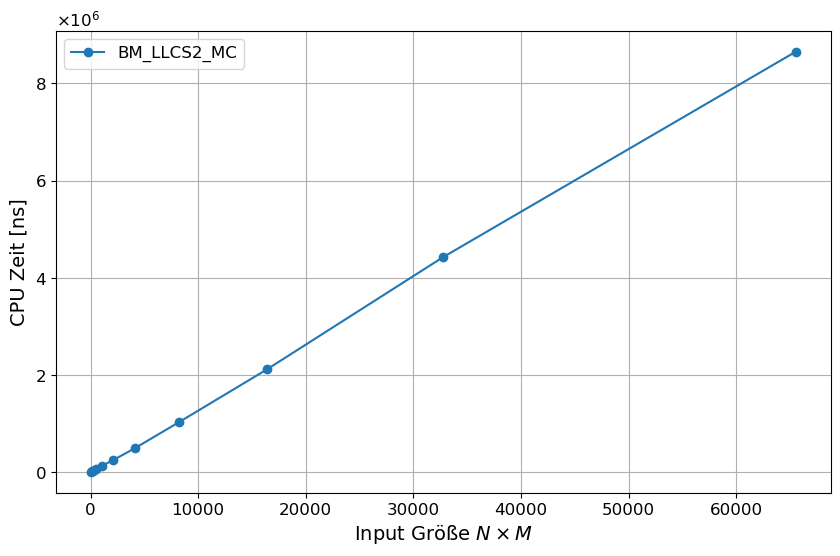

In [7]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


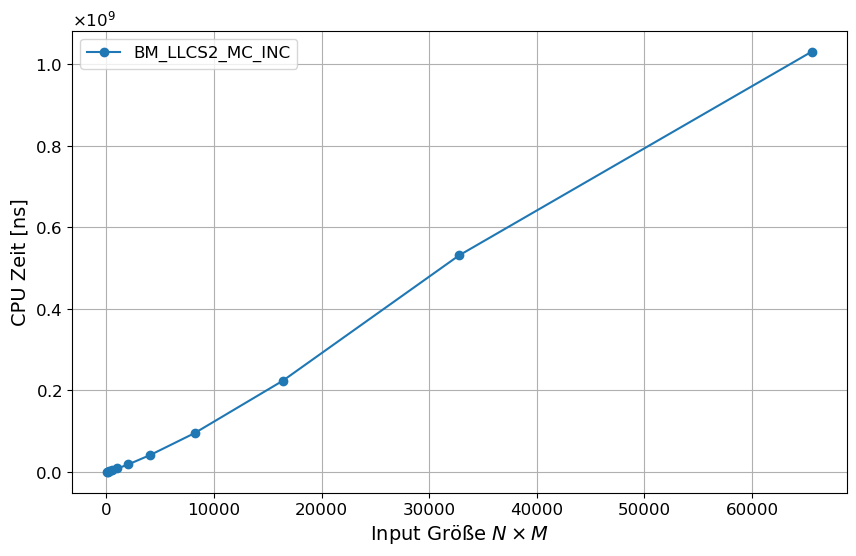

In [8]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC_INC')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


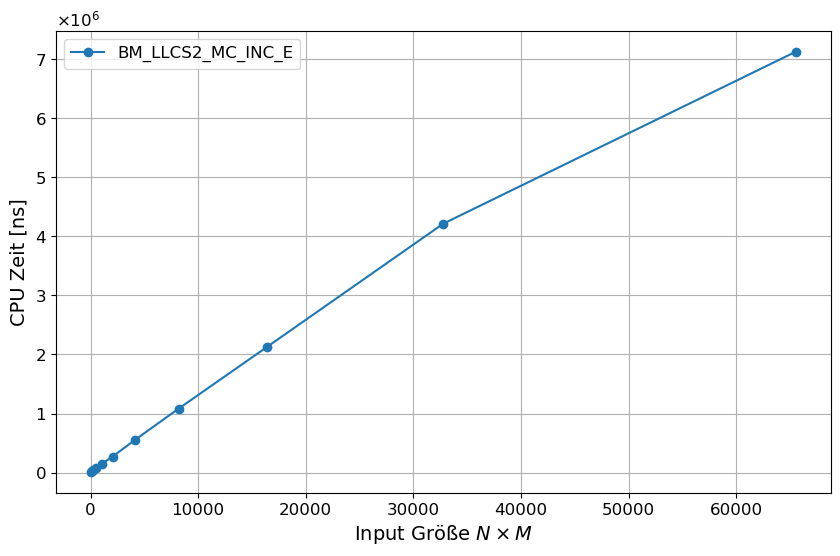

In [9]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC_INC_E')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


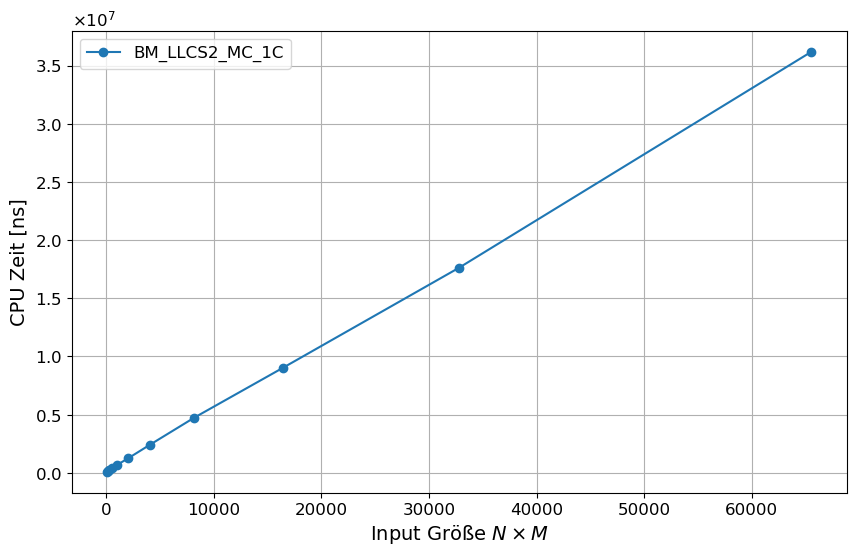

In [10]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC_1C')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


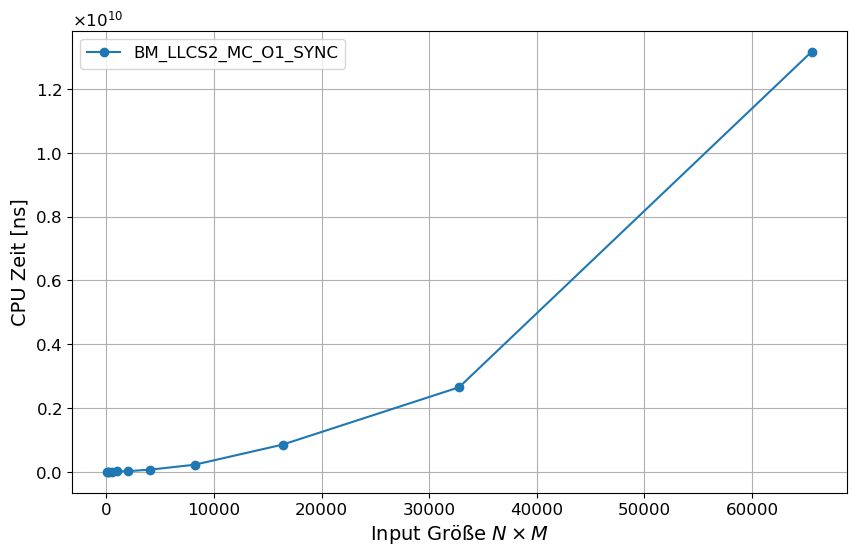

In [11]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC_O1_SYNC')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


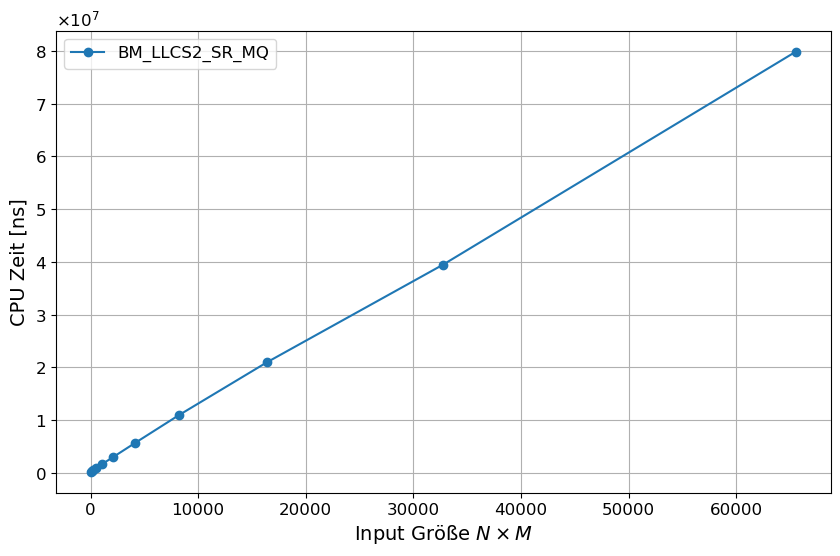

In [12]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_SR_MQ')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


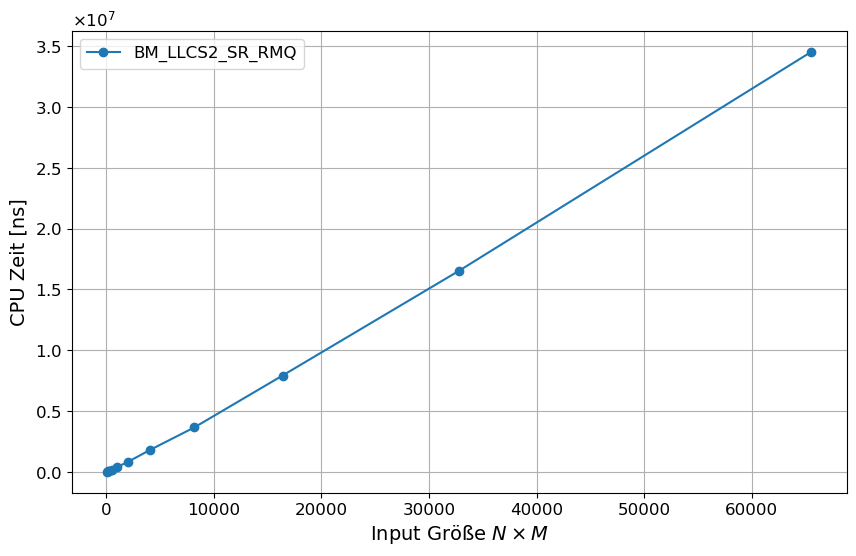

In [13]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_SR_RMQ')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


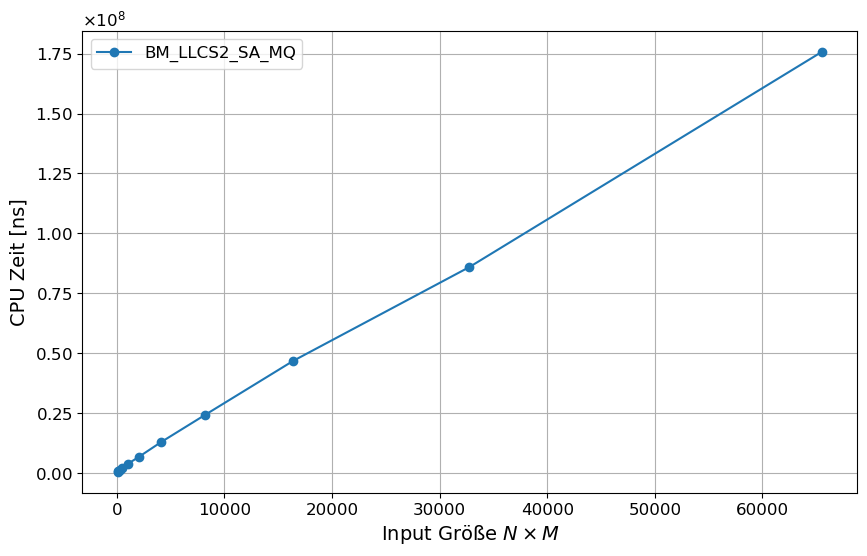

In [14]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_SA_MQ')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


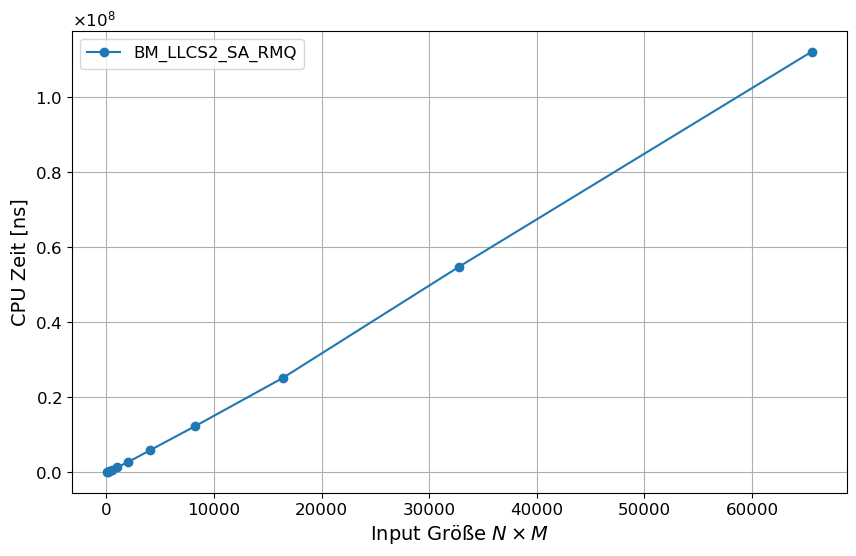

In [15]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_SA_RMQ')